In [123]:
import os
import pandas as pd
import matplotlib.pyplot as plt
# Set default plotly template
import plotly.io as pio
pio.templates.default = "plotly_white"

import plotly.express as px

STATE = 'thermal'
IMG_WIDTH = 600
IMG_HEIGHT = 350

# Set default plotly image format and dimensions
pio.kaleido.scope.default_format = "pdf"
#pio.kaleido.scope.mathjax= None
pio.kaleido.scope.default_width = IMG_WIDTH
pio.kaleido.scope.default_height = IMG_HEIGHT

COLOR_CYCLE = [
    '#F44336',  # 0
    '#3F51B5',  # 4
    '#009688',  # 8
    '#FFC107',  # 13
    '#FF5722',  # 15
    '#9C27B0',  # 2
    '#03A9F4',  # 6
    '#8BC34A',  # 10
    '#FF9800',  # 14
    '#E91E63',  # 1
    '#2196F3',  # 5
    '#4CAF50',  # 9
    '#FFEB3B',  # 12
    '#673AB7',  # 3
    '#00BCD4',  # 7
    '#CDDC39',  # 11b
    '#9E9E9E',  # 17
    '#607D8B',  # 18
]
LINESTYLES = [':', '--', '-']

# Create saving folder if it does not exists
if not os.path.exists(f'../img/obs_evolution/{STATE}'):
    os.makedirs(f'../img/obs_evolution/{STATE}')

In [137]:
def set_axes(axs):
    for ax in axs:
        ax.set_prop_cycle('color', COLOR_CYCLE)
        # Set the background color of the plot to white
        ax.set_facecolor('white')
        # Customize the gridlines
        ax.grid(color='lightgrey', linestyle='--', linewidth=0.5)
        # Set the color of the ticks to match the gridlines
        ax.tick_params(axis='both', which='both', colors='lightgrey', labelcolor='black')
        for spine in ax.spines.values():
            spine.set_color('lightgrey')
    return None

In [117]:
df = pd.read_pickle(f'../objects/{STATE}/observables.pkl')
df = df[df['Time'] <= 1500]
df.head()

Mutual Information  Quantum Discord Logarithmic Negativity  Time  \
0            0.000000        -2.772319                      0  0.00   
1            0.000004        -2.768434                      0  1.35   
2            0.000015        -2.764563                      0  2.70   
3            0.000034        -2.760704                      0  4.05   
4            0.000060        -2.756859                      0  5.40   

   Interaction Time        N1        N2         S        S1        S2  \
0              0.05  0.999805  0.999805  2.772319  1.386159  1.386159   
1              0.05  0.999808  0.994247  2.768459  1.386161  1.382298   
2              0.05  0.999810  0.988781  2.764649  1.386162  1.378486   
3              0.05  0.999811  0.983406  2.760886  1.386163  1.374723   
4              0.05  0.999812  0.978121  2.757172  1.386164  1.371008   

         J1        J2        Jc  
0  0.000000  0.000000  0.000000  
1 -0.000052 -0.000051 -0.000102  
2 -0.000051 -0.000049 -0.000100  
3 -0.000051 -0.000048 -0.000099  
4 -0.000050 -0.000047 -0.000097

## Mean Photon Numbers

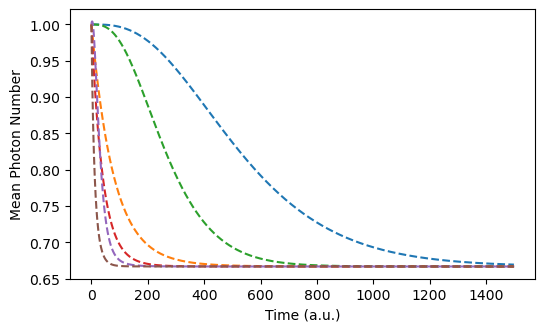

In [118]:
df_melt = df.melt(id_vars=['Time', 'Interaction Time'], value_vars=['N1', 'N2'], var_name='System', value_name='Temperature')
new_label_s1 = ['$S_1$' for _ in range(len(df_melt.loc[df_melt['System'] == 'N1']))]
new_label_s2 = ['$S_2$' for _ in range(len(df_melt.loc[df_melt['System'] == 'N2']))]
new_label_dt = [f'${dt}$' for dt in df_melt['Interaction Time']]
df_melt.loc[df_melt['System'] == 'N1', 'System'] = new_label_s1
df_melt.loc[df_melt['System'] == 'N2', 'System'] = new_label_s2
df_melt['Interaction Time'] = new_label_dt

fig, ax = plt.subplots(figsize=(IMG_WIDTH/100, IMG_HEIGHT/100))
for name, group in df_melt.groupby(['Interaction Time', 'System']):
    if name[1] == 'S_1$':
        linestyle = '-'
    else:
        linestyle = '--'
    ax.plot(group['Time'], group['Temperature'], label=name[0], linestyle=linestyle)
ax.set_xlabel('Time (a.u.)')
ax.set_ylabel('Mean Photon Number')
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

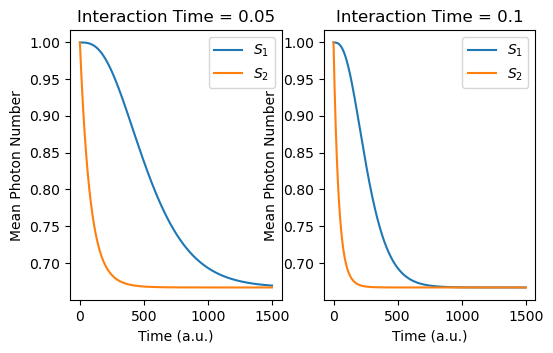

In [119]:
fig, axs = plt.subplots(ncols=2, figsize=(IMG_WIDTH/100, IMG_HEIGHT/100))
for i, (name, group) in enumerate(df.groupby('Interaction Time')):
    axs[i].plot(group['Time'], group['N1'], label='$S_1$')
    axs[i].plot(group['Time'], group['N2'], label='$S_2$')
    axs[i].set_xlabel('Time (a.u.)')
    axs[i].set_ylabel('Mean Photon Number')
    axs[i].set_title(f'Interaction Time = {name}')
    axs[i].legend()
plt.show()

## Entropies

In [112]:
df_melt = df.melt(id_vars=['Time', 'Interaction Time'], value_vars=['S1', 'S2'], var_name='System', value_name='Entropy')
new_label_s1 = ['S_1$' for _ in range(len(df_melt.loc[df_melt['System'] == 'S1']))]
new_label_s2 = ['S_2$' for _ in range(len(df_melt.loc[df_melt['System'] == 'S2']))]
new_label_dt = [f'${dt}' for dt in df_melt['Interaction Time']]
df_melt.loc[df_melt['System'] == 'S1', 'System'] = new_label_s1
df_melt.loc[df_melt['System'] == 'S2', 'System'] = new_label_s2
df_melt['Interaction Time'] = new_label_dt
fig_entropy = px.line(df_melt, x='Time', y='Entropy',
                      color='Interaction Time', line_dash='System',
                      width=IMG_WIDTH, height=IMG_HEIGHT,
                      labels={'Time': 'Time (a.u.)'},
                    )
fig_entropy.update_layout(
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99,
        bordercolor="Black",
        borderwidth=0,
))
fig_entropy.show()

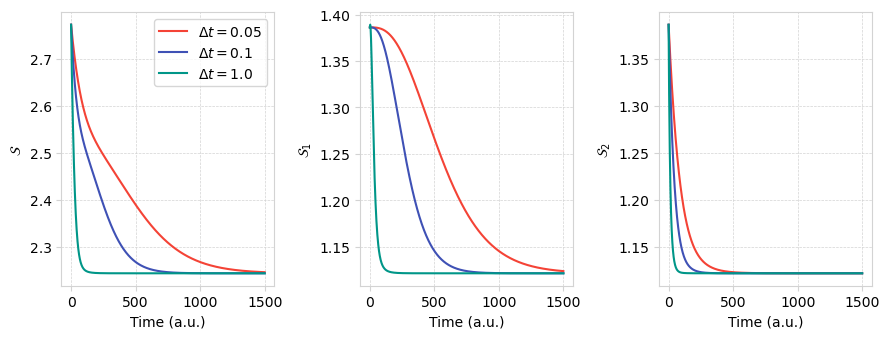

In [138]:
fig, axs = plt.subplots(ncols=3, figsize=(IMG_WIDTH/100 + 3, IMG_HEIGHT/100), tight_layout=True)
ax_names = {
    0.05: '$\Delta t = 0.05$',
    0.1: '$\Delta t = 0.1$',
    1.0: '$\Delta t = 1.0$',
}

y_names = {
    'S': '$\mathcal{S}$',
    'S1': '$\mathcal{S}_1$',
    'S2': '$\mathcal{S}_2$'
}
set_axes(axs)

for i, (name, group) in enumerate(df.groupby('Interaction Time')):
    for j, entropy in enumerate(['S', 'S1', 'S2']):
        axs[j].plot(group['Time'], group[entropy], label=f'{ax_names[name]}')
        axs[j].set_xlabel('Time (a.u.)')
        axs[j].set_ylabel(f'{y_names[entropy]}')

axs[0].legend()



## Quantum Discord

(0.0, 600.0)

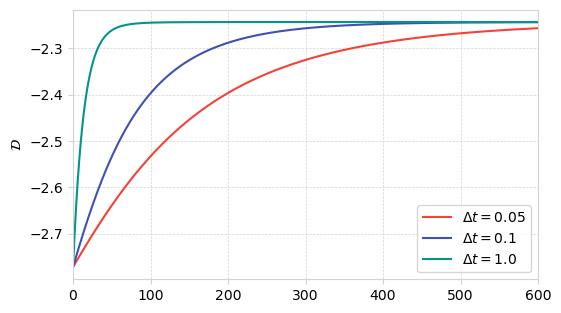

In [139]:
fig, ax = plt.subplots(figsize=(IMG_WIDTH/100, IMG_HEIGHT/100))
set_axes([ax])

for name, group in df.groupby('Interaction Time'):
    ax.plot(group['Time'], group['Quantum Discord'], label=f'{ax_names[name]}')
ax.set_ylabel('$\mathcal{D}$')
ax.legend()

ax.set_xlim(0, 600)

## Mutual Information

(0.0, 600.0)

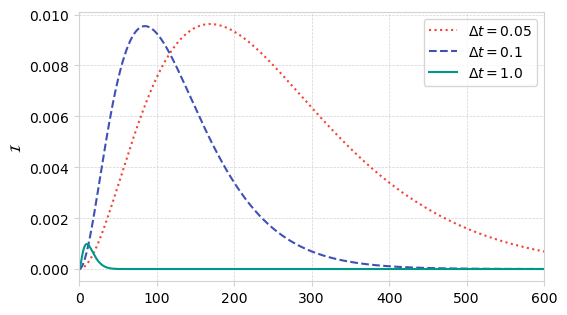

In [141]:
fig, ax = plt.subplots(figsize=(IMG_WIDTH/100, IMG_HEIGHT/100))
set_axes([ax])

for i, (name, group) in enumerate(df.groupby('Interaction Time')):
    ax.plot(group['Time'], group['Mutual Information'], label=f'{ax_names[name]}', ls=LINESTYLES[i])
ax.set_ylabel('$\mathcal{I}$')
ax.legend()
ax.set_xlim(0, 600)

## Logarithmic Negativity

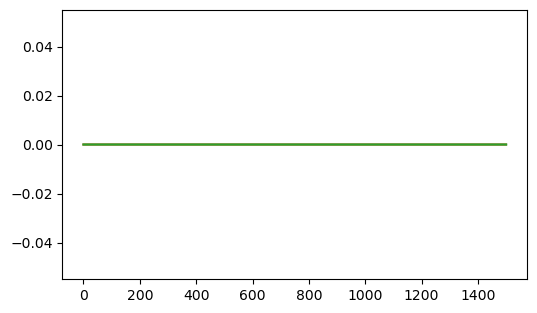

In [72]:
fig, ax = plt.subplots(figsize=(IMG_WIDTH/100, IMG_HEIGHT/100))
for name, group in df.groupby('Interaction Time'):
    ax.plot(group['Time'], group['Logarithmic Negativity'], label=f'{ax_names[name]}')

## Heat Exchanges

In [82]:
df_melt = df.loc[df['Time']>0].melt(id_vars=['Time', 'Interaction Time'], value_vars=['Jc', 'J1', 'J2'], var_name='Current', value_name='Heat')
new_label_j1 = ['J_1$' for _ in range(len(df_melt.loc[df_melt['Current'] == 'J1']))]
new_label_j2 = ['J_2$' for _ in range(len(df_melt.loc[df_melt['Current'] == 'J2']))]
new_label_j = ['J_c$' for _ in range(len(df_melt.loc[df_melt['Current'] == 'Jc']))]
new_label_dt = [f'${dt}' for dt in df_melt['Interaction Time']]
df_melt.loc[df_melt['Current'] == 'J1', 'Current'] = new_label_j1
df_melt.loc[df_melt['Current'] == 'J2', 'Current'] = new_label_j2
df_melt.loc[df_melt['Current'] == 'Jc', 'Current'] = new_label_j
df_melt['Interaction Time'] = new_label_dt
fig_heat = px.line(df_melt, x='Time', y='Heat',
                   color='Interaction Time', line_dash='Current',
                   width=IMG_WIDTH, height=IMG_HEIGHT,
                   labels={'Time': 'Time (a.u.)'})
fig_heat.update_layout(
    legend=dict(
        yanchor="top",
        y=0.95,
        xanchor="right",
        x=0.99,
        bordercolor="Black",
        borderwidth=0,
    ),
    margin=dict(
        autoexpand=False,
    ),
)
fig_heat.update_xaxes(range=[0, 150])
fig_heat.update_yaxes(range=[-0.01, 0.0001])
fig_heat.show()

C:\Users\fedes\AppData\Local\Temp\ipykernel_11000\82965148.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



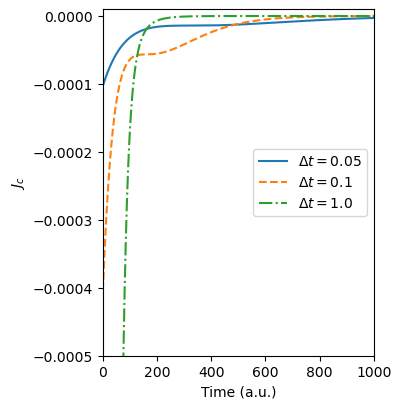

In [20]:
df_to_plot = df.loc[df['Time'] > 0]
new_labels = ['$\Delta t =' + str(dt) + '$' for dt in df_to_plot['Interaction Time']]
df_to_plot.loc[:, 'Interaction Time'] = new_labels

fig, ax = plt.subplots(figsize=(3.5, 4.5))
linestyles = ['-', '--', '-.', ':']
for i, (name, group) in enumerate(df_to_plot.groupby('Interaction Time')):
    ax.plot(group['Time'], group['Jc'], label=name, linestyle=linestyles[i % len(linestyles)])
ax.set_xlim([0, 1000])
ax.set_ylim([-0.0005, 0.00001])
ax.set_xlabel('Time (a.u.)')
ax.set_ylabel('$J_c$')
ax.legend(loc='center right', title='')
plt.show()

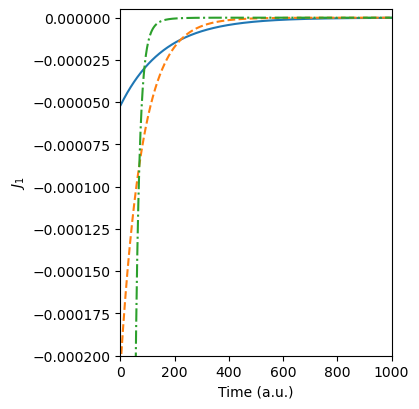

In [21]:
fig, ax = plt.subplots(figsize=(3.5, 4.5))
linestyles = ['-', '--', '-.', ':']
for i, (name, group) in enumerate(df_to_plot.groupby('Interaction Time')):
    ax.plot(group['Time'], group['J1'], label=name, linestyle=linestyles[i % len(linestyles)])
ax.set_xlim([0, 1000])
ax.set_ylim([-0.0002, 0.000005])
ax.set_xlabel('Time (a.u.)')
ax.set_ylabel('$J_1$')
plt.show()

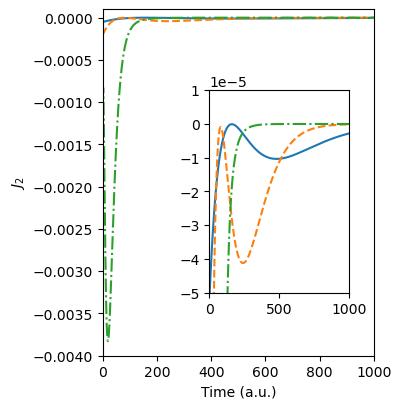

In [22]:
fig, ax = plt.subplots(figsize=(3.5, 4.5))
linestyles = ['-', '--', '-.', ':']
for i, (name, group) in enumerate(df_to_plot.groupby('Interaction Time')):
    ax.plot(group['Time'], group['J2'], label=name, linestyle=linestyles[i % len(linestyles)])
ax.set_xlim([0, 1000])
ax.set_ylim([-0.004, 0.0001])
ax.set_xlabel('Time (a.u.)')
ax.set_ylabel('$J_2$')

# Create an inset plot
axins = fig.add_axes([0.43, 0.25, 0.4, 0.45])
for i, (name, group) in enumerate(df_to_plot.groupby('Interaction Time')):
    axins.plot(group['Time'], group['J2'], label=name, linestyle=linestyles[i % len(linestyles)])
axins.set_xlim([0, 1000])
axins.set_ylim([-0.00005, 0.00001])

plt.show()

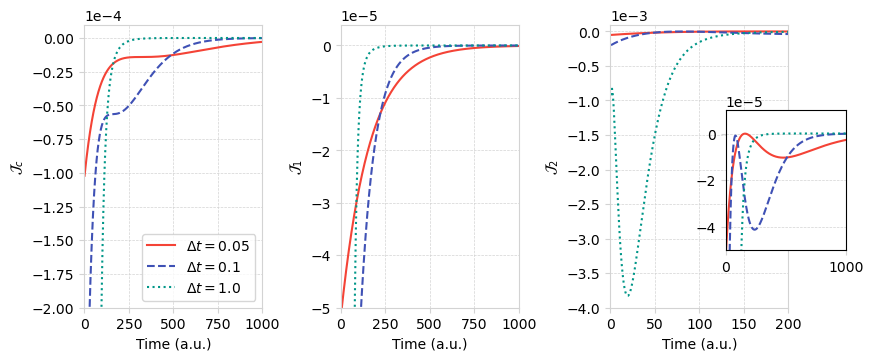

In [149]:
fig, axs = plt.subplots(ncols=3, figsize=(IMG_WIDTH/100 + 2, IMG_HEIGHT/100), constrained_layout=True)
ax_names = {
    0.05: '$\Delta t = 0.05$',
    0.1: '$\Delta t = 0.1$',
    1.0: '$\Delta t = 1.0$',
}

y_names = {
    'Jc': '$\mathcal{J}_c$',
    'J1': '$\mathcal{J}_1$',
    'J2': '$\mathcal{J}_2$'
}
linestyles = ['-', '--', ':']
set_axes(axs)

for i, (name, group) in enumerate(df.loc[df['Time'] > 0].groupby('Interaction Time')):
    for j, current in enumerate(['Jc', 'J1', 'J2']):
        axs[j].plot(group['Time'], group[current], label=f'{ax_names[name]}', ls=linestyles[i])
        axs[j].set_xlabel('Time (a.u.)')
        axs[j].set_ylabel(f'{y_names[current]}')
for ax in axs:
        ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
        
axs[0].set_xlim([0, 1000])
axs[1].set_xlim([0, 1000])
axs[2].set_xlim([0, 200])
axs[0].set_ylim([-2e-4, 1e-5])
axs[1].set_ylim([-5e-5, 4e-6])
axs[2].set_ylim([-4e-3, 1e-4])
axs[0].legend()

# Create an inset plot
axins = fig.add_axes([0.9, 0.3, 0.15, 0.4])
set_axes([axins])
for spine in axins.spines.values():
    spine.set_color('black')

for i, (name, group) in enumerate(df_to_plot.groupby('Interaction Time')):
    axins.plot(group['Time'], group['J2'], label=name, linestyle=linestyles[i])
axins.set_xlim([0, 1001])
axins.set_ylim([-0.00005, 0.00001])

plt.show()